# COVERAGE OnEarth Examples

## WMS Requests

The following examples demonstrate how to access COVERAGE browse imagery using the OnEarth Web Map Service (WMS).

### COVERAGE OnEarth

In [1]:
# Import libraries
from owslib.wms import WebMapService
from IPython.display import Image

#### First we will connect to the COVERAGE OnEarth WMS Service and visualize these data layers:

* JPL-CHL25-fv03_ChlorophyllAconcentration
* SSH_CMEMS_AVISO_SEALEVEL_GLO_PHY_L4_REP_OBSERVATIONS_SeaSurfaceHeightAnomaly

In [23]:
# Connect to COVERAGE OnEarth WMS Service
wms = WebMapService('https://oiip.jpl.nasa.gov/onearth/wms/epsg4326/wms.cgi?', version='1.1.1')

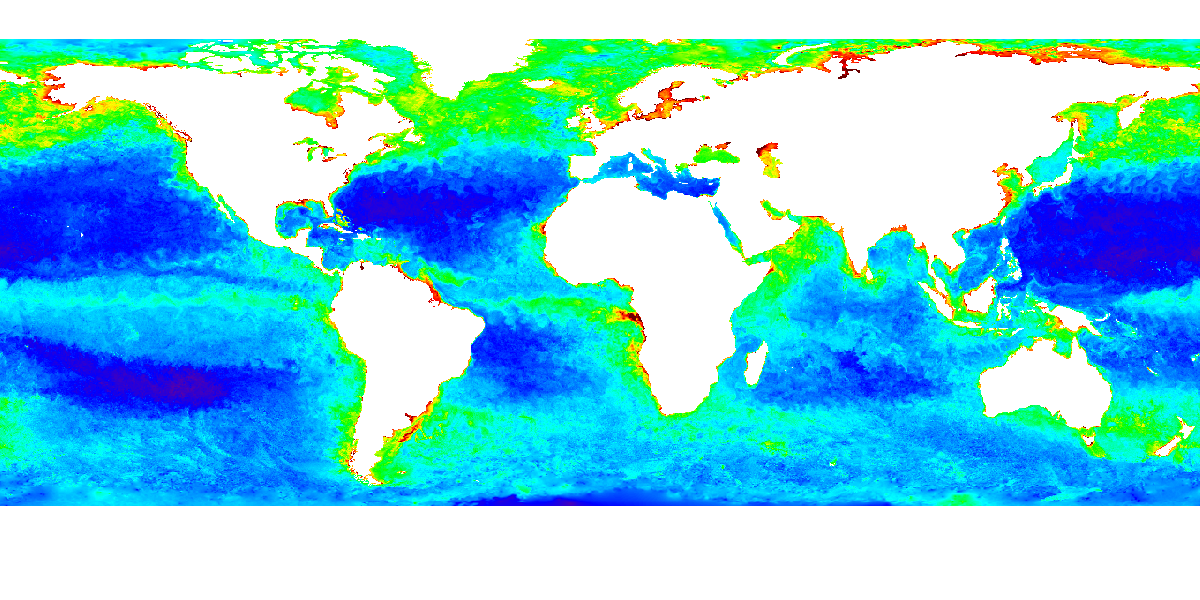

In [36]:
# JPL-CHL25-fv03_ChlorophyllAconcentration
img = wms.getmap(layers=['JPL-CHL25-fv03_ChlorophyllAconcentration'],  # Layers
                 srs='epsg:4326',  # Map projection
                 bbox=(-180,-90,180,90),  # Bounds
                 size=(1200, 600),  # Image size
                 time='2021-09-01',  # Time of data
                 format='image/png',  # Image format
                 transparent=True)  # Nodata transparency

# Save output PNG to a file
out = open('JPL-CHL25-fv03_ChlorophyllAconcentration.png', 'wb')
out.write(img.read())
out.close()

# View image
Image('JPL-CHL25-fv03_ChlorophyllAconcentration.png')

### Interactive Web Map

The next example shows how to display the SSH_CMEMS_AVISO_SEALEVEL_GLO_PHY_L4_REP_OBSERVATIONS_SeaSurfaceHeightAnomaly imagery in an interactive web map (may require additional Python libraries).

In [35]:
from ipyleaflet import Map, WMSLayer, basemaps

# Make a WMS connection to a map layer
wms_layer = WMSLayer(url='https://oiip.jpl.nasa.gov/onearth/wms/epsg4326/wms.cgi?',
                     layers='SSH_CMEMS_AVISO_SEALEVEL_GLO_PHY_L4_REP_OBSERVATIONS_SeaSurfaceHeightAnomaly',
                     format='image/png',
                     time='2018-01-01',
                     transparent=True)

# Define map properties and add the WMS layer from above on top of basemap
m = Map(basemap=basemaps.NASAGIBS.BlueMarble, center=(30, -30), zoom=3)
m.add_layer(wms_layer)

# Display interactive web map
m

Map(center=[30, -30], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…